In [29]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [30]:
mpl.__version__

'3.5.1'

In [31]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [32]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [34]:
plt.style.use("../matplotlib_style.txt")

# Fig 4: machine learning

## Import

In [35]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [36]:
tsne = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

In [37]:
# legend colors
# save results
ml_colors = np.load(variables_path / "ml_colors.npy", allow_pickle=True)

pickle_in = open(variables_path / "ml_legend.pkl", "rb")
ml_legend = pickle.load(pickle_in)

In [38]:
square_coordinates = np.load(
    variables_path / "square_coordinates_ml_regions.npy"
)

In [39]:
mask_machine_learning = np.load(variables_path / "mask_machine_learning.npy")

In [40]:
# save results
colors_new = np.load(variables_path / "colors_new.npy", allow_pickle=True)

In [41]:
pickle_in = open(variables_path / "colors_new_legend.pkl", "rb")
colors_new_legend = pickle.load(pickle_in)

In [42]:
# load
gam_fraction_ml_labels_plotting_results = pd.read_pickle(
    variables_path / "gam_fraction_ml_labels_plotting_results"
)

In [43]:
gam_fraction_ml_labels_plotting_results_T = (
    gam_fraction_ml_labels_plotting_results.transpose()
)

In [44]:
pickle_in = open(variables_path / "fraction_ml_labels.pkl", "rb")
fraction_ml_labels = pickle.load(pickle_in)

In [45]:
pickle_in = open(variables_path / "X_years_labels.pkl", "rb")
X_years_labels = pickle.load(pickle_in)

## Plot

In [46]:
labels_abbrv = {
    "random forest": "RF",
    "neural network": "NN",
    "convolutional": "CNN",
    "linear regression": "LR",
    "clustering": "Clustering",
    "dimensionality reduction": "DR",
    "support vector": "SVM",
    "factor analysis": "FA",
    "principal component analysis": "PCA",
    "deep learning": "DL",
}

In [47]:
region_labels = [
    "protein structure",
    "sequencing ",
    "tumor imaging",
    "cancer biomarkers",
    "computational chemistry",
    "healthcare data",
    "ML algorithms",
    "eeg signals",
    "image segmentation",
    "covid-19 tweets",
    "microbiome",
    "mass spectometry",
]

In [48]:
region_labels_numbers = {
    "protein structure": 8,
    "sequencing ": 2,
    "tumor imaging": 10,
    "cancer biomarkers": 7,
    "computational chemistry": 9,
    "healthcare data": 6,
    "ML algorithms": 4,
    "eeg signals": 1,
    "image segmentation": 3,
    "covid-19 tweets": 12,
    "microbiome": 11,
    "mass spectometry": 5,
}

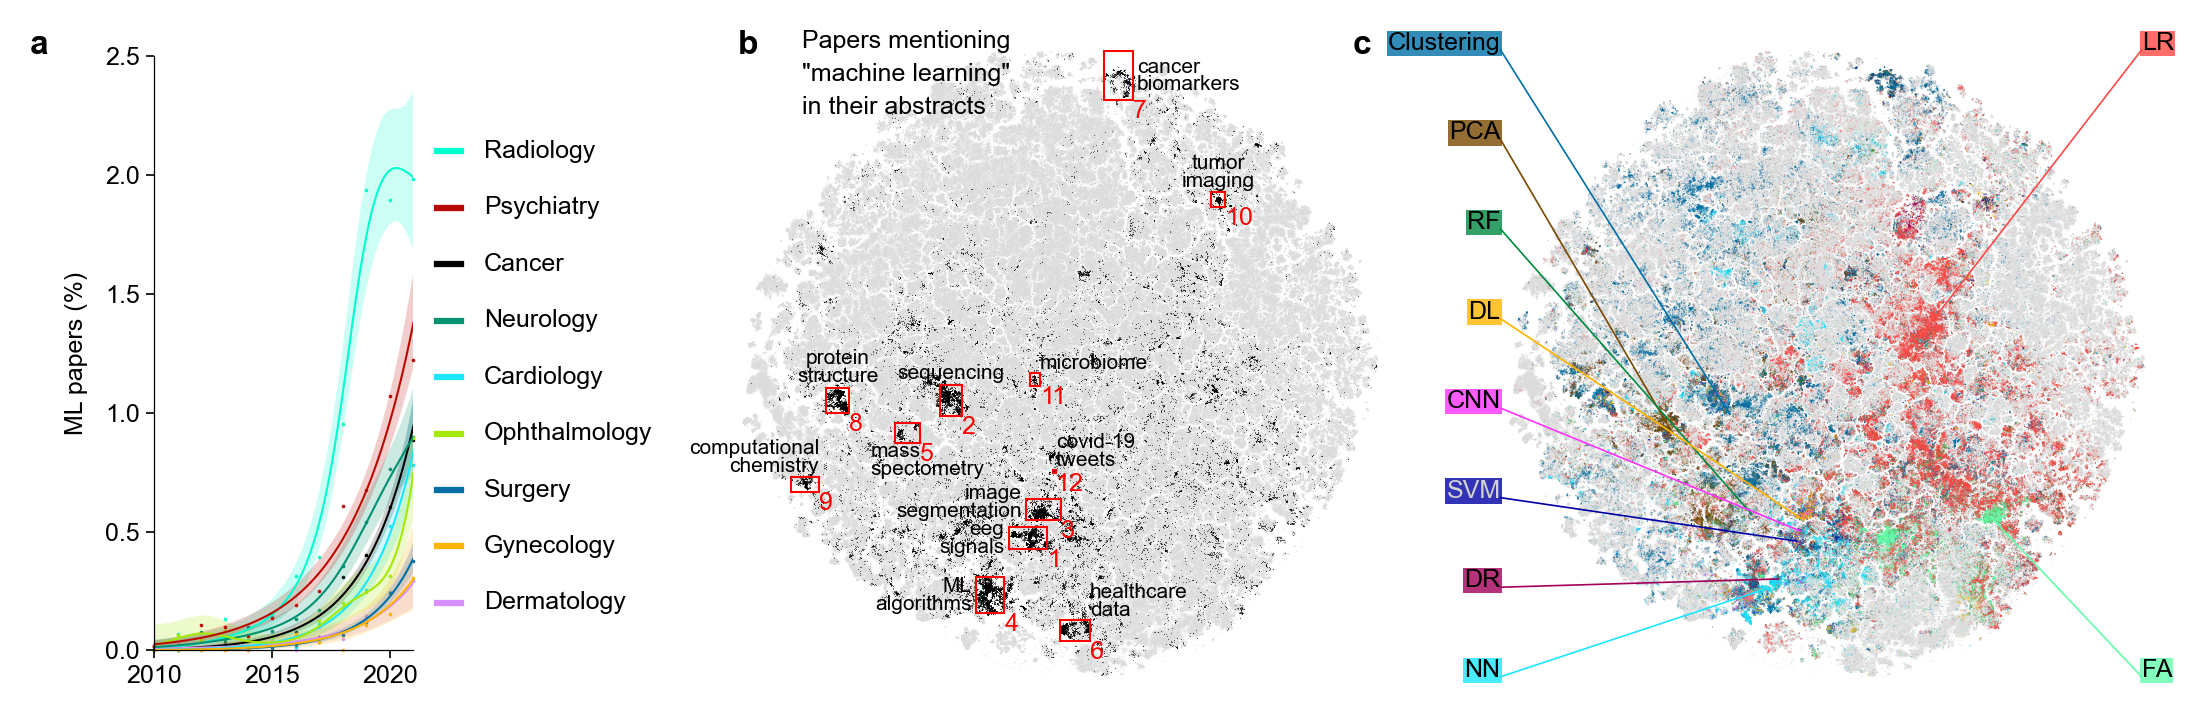

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(7.2, 2.2), dpi=300)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

# subplot a
x_lim = (-220, 220)
y_lim = (-220, 220)
ax0 = fig.add_axes([0.685, 0.02, 0.3, 0.95])
np.random.seed(42)
subset = np.random.permutation(tsne.shape[0])[:10000]
plot_tsne_colors(
    tsne,
    ml_colors,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax0,
    plot_type="pdf ML",
    axis_on=False,
)
plot_ml_label_tags(
    tsne,
    ml_colors,
    ml_legend,
    abbrv=labels_abbrv,
    x_lim=(-230, 220),
    y_lim=y_lim,
    ax=ax0,
    fontsize=6,
)
ax0_letter = fig.add_axes([0.615, 0, 0.3, 1])
ax0_letter.text(
    0,
    1,
    string.ascii_lowercase[2],
    transform=ax0_letter.transAxes,
    **txtkwargs
)
ax0_letter.axis("off")

# subplot b
x_lim = (-220, 220)
y_lim = (-220, 220)
subregion = tsne[mask_machine_learning]


s_grey = 0.5
alpha_grey = 0.02
s_color = 0.2
alpha_color = 0.5

ax1 = fig.add_axes([0.33, 0.02, 0.3, 0.95])
ax1.scatter(
    tsne[:, 0],
    tsne[:, 1],
    c="lightgrey",
    s=s_grey,
    alpha=alpha_grey,
    marker=".",
    linewidths=0,
    rasterized=True,
    ec="None",
)
ax1.scatter(
    subregion[:, 0],
    subregion[:, 1],
    s=s_color,
    c="black",
    alpha=alpha_color,
    marker=".",
    linewidths=0,
    rasterized=True,
)

for i in range(square_coordinates.shape[0]):
    plot_square(square_coordinates[i], lw=0.5)

plot_region_names(square_coordinates, ax1, region_labels, fontsize=5)
plot_region_numbers(
    square_coordinates, ax1, region_labels, region_labels_numbers
)

ax1.axis("equal")
ax1.set_xlim(x_lim[0], x_lim[1])
ax1.set_ylim(y_lim[0], y_lim[1])
ax1.axis("off")
ax1_letter = fig.add_axes([0.33, 0, 0.3, 1])
ax1_letter.text(
    0,
    1,
    string.ascii_lowercase[1],
    transform=ax1_letter.transAxes,
    **txtkwargs
)
ax1_letter.text(
    0.1,
    1,
    "Papers mentioning",
    fontsize=6,
    transform=ax1_letter.transAxes,
    va="top",
    ha="left",
)
ax1_letter.text(
    0.1,
    0.95,
    '"' + "machine learning" + '"',
    fontsize=6,
    transform=ax1_letter.transAxes,
    va="top",
    ha="left",
)
ax1_letter.text(
    0.1,
    0.9,
    "in their abstracts",
    fontsize=6,
    transform=ax1_letter.transAxes,
    va="top",
    ha="left",
)
ax1_letter.axis("off")

# subplot c
labels = [
    "cancer",
    "radiology",
    "dermatology",
    "cardiology",
    "neurology",
    "ophthalmology",
    "surgery",
    "anesthesiology",
    "gynecology",
    "pediatric",
    "rehabilitation",
    "psychiatry",
    "pathology",
]
years = np.arange(2010, 2022)
ax2 = fig.add_axes([0.06, 0.06, 0.12, 0.9])  # left, bottom, width, height
last_point_labels = []
excluded_labels = [
    "anesthesiology",
    "rehabilitation",
    "pathology",
    "pediatric",
]
for label in labels:
    if label in excluded_labels:
        continue
    ax2.plot(
        gam_fraction_ml_labels_plotting_results_T.XX[label][:, 0],
        (gam_fraction_ml_labels_plotting_results_T.pdep[label]) * 100,
        c=colors_new_legend[label],
        label=label.capitalize(),
    )

    ax2.fill_between(
        gam_fraction_ml_labels_plotting_results_T.XX[label][:, 0],
        (gam_fraction_ml_labels_plotting_results_T.confi[label])[:, 1] * 100,
        (gam_fraction_ml_labels_plotting_results_T.confi[label])[:, 0] * 100,
        color=colors_new_legend[label],
        alpha=0.2,
        edgecolor=None,
    )

    ax2.scatter(
        np.unique(X_years_labels[label]),
        np.array(fraction_ml_labels[label]) * 100,
        c=colors_new_legend[label],
        marker=".",
        s=3,
        clip_on=False,
        linewidths=0,
    )

    last_point_labels.append(
        gam_fraction_ml_labels_plotting_results_T.pdep[label][-1]
    )


last_point_labels = np.hstack(last_point_labels)

## plot handmade legend
for label in excluded_labels:
    labels.remove(label)
sorted_indeces = np.flip(np.argsort(last_point_labels))
sorted_labels = np.array(labels)[sorted_indeces]

x = 2024 * np.ones(len(sorted_labels))
y = np.linspace(2.1, 0.2, len(sorted_labels))

for i, label in enumerate(sorted_labels):
    colr = colors_new_legend[label]
    ax2.plot(
        [2022, 2023],
        [y[i], y[i]],
        "-",
        ms=3,
        linewidth=1.5,
        c=colr,
        clip_on=False,
    )
    ax2.text(x[i], y[i], label.capitalize(), fontsize=6, va="center")

ax2.set_xlim(left=2010, right=2021)
ax2.set_ylim(bottom=0)
ax2.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
ax2.set_xticks([2010, 2015, 2020])
ax2.set_ylabel("ML papers (%)", fontsize=6)

ax2_letter = fig.add_axes([0.06, 0, 0.25, 1])
ax2_letter.text(
    -0.23,
    1,
    string.ascii_lowercase[0],
    transform=ax2_letter.transAxes,
    **txtkwargs
)
ax2_letter.axis("off")

fig.savefig(figures_path / "fig_4_ml.png", dpi=300)
fig.savefig(figures_path / "fig_4_ml.pdf", dpi=300)